## **Importing the necessary libraries**

In [1]:
# Library used for data manipulation and analysis
import pandas as pd

# Library used for working with arrays
import numpy as np  

# Libraries for visualization
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns  

# This library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats

## **Binomial Distribution**

### **Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for LED light bulbs, that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.**

**a) What is the probability that none of the LED bulbs are defective?**

[5.987e-01 3.151e-01 7.460e-02 1.050e-02 1.000e-03 1.000e-04 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
Probability that none of the bulbs are defective =  0.5987


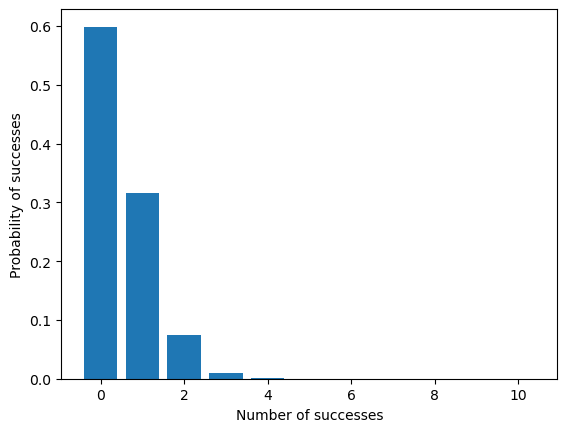

In [38]:
from scipy.stats import binom
p = 0.05
n = 10
sample = np.arange(n+1)

binomial = np.round(binom.pmf(k=sample, n=n, p=p), 4)

print(binomial)
print("Probability that none of the bulbs are defective = ", binomial[0])

plt.bar(sample, binomial)
plt.xlabel("Number of successes")
plt.ylabel("Probability of successes")
plt.show()

**b) What is the probability that exactly one LED bulb is defective?**

In [39]:
print("Probability that one of the bulbs are defective = ", binomial[1])

Probability that one of the bulbs are defective =  0.3151


**c) What is the probability that two or fewer LED bulbs are defective?**

**Hint:** We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [41]:
cumulative_binomial = binom.cdf(k=sample, n=n, p=p)
print("the probability that two or fewer LED bulbs are defective = ", cumulative_binomial[2])

the probability that two or fewer LED bulbs are defective =  0.9884964426207031


**d) What is the probability that three or more LED bulbs are defective?**

**Hint:** We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [43]:
print("the probability that three or more LED bulbs are defective = ", 
      (1-cumulative_binomial[2]))
# 3 defective is included in probability so use cdf for 2

the probability that three or more LED bulbs are defective =  0.01150355737929687


### **Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of foul shots is 93%. Find the following probabilities.**

**a) What is the probability that the player will convert both the shots?**

In [45]:
p=0.93
n=2
sample = np.arange(n+1)
sample_prob = binom.pmf(k=sample, n=n, p=p)
print("the probability that the player will convert both the shots =",
     sample_prob[2])


the probability that the player will convert both the shots = 0.8649000000000001


**b) What is the probability that the player will convert at least one shot?**

In [46]:
print("the probability that the player will convert at least one of the shots =",
     1-binom.cdf(0, n, p))

the probability that the player will convert at least one of the shots = 0.9951


### **Q3. Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory, and 5% are rated as unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.**

**a) Two are rated as outstanding**

In [47]:
p_outstanding = 0.10
p_excellent = 0.75
p_satisfactory = 0.10
p_unsatisfactory = 0.05

n = 10
sample = np.arange(n+1)

binom_outstanding = binom.pmf(k=sample, n=n, p=p_outstanding)
print("Probability that Two are rated as outstanding = ", binom_outstanding[2])


Probability that Two are rated as outstanding =  0.19371024450000007


**b) Two or more are rated as outstanding**

In [48]:
1-binom.cdf(k=1, n=n, p=p_outstanding)

0.26390107090000003

**c) Eight of the ten are rated either outstanding or excellent**

In [49]:
p_outstanding_or_excellent = p_outstanding + p_excellent
pmf = binom.pmf(k=8, n=n, p=p_outstanding_or_excellent)
pmf

0.27589665660205076

**d) None of the trainees are rated as unsatisfactory**

In [50]:
binom.pmf(k=0, n=n, p=p_unsatisfactory)

0.5987369392383787

## **Uniform Distribution**

### **Q4. A university records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**

### **Loading the dataset**

In [51]:
assignment = pd.read_csv('data/assignment.csv')

assignment.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


In [13]:
assignment.describe()

,Student_ID,Time_taken
count,1000.000000,1000.000000
mean,508.611000,2.497440
std,293.527757,0.851082
min,2.000000,1.000000
25%,256.000000,1.767500
50%,525.000000,2.500000
75%,760.250000,3.230000
max,999.000000,4.000000


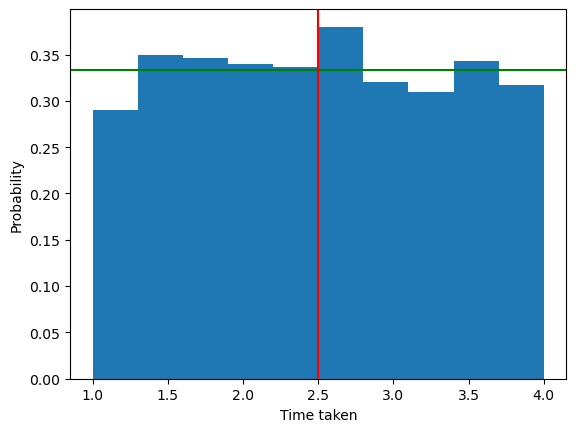

In [52]:
plt.hist(assignment["Time_taken"], density=True)
plt.xlabel('Time taken')
plt.ylabel('Probability')
plt.axhline(1 / 3, color = 'green')
plt.axvline(x=2.5, color='red')
plt.show()

Insight: The above plot shows that all the values between 1 and 4 have almost equal probability. We are going to use continuous uniform distribution. We need to decide the endpoints. Here, the endpoints are 1 and 4.

X ~ U(1, 4)

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF** of a random variable (X) is the probability that X will take the value less than or equal to x. Mathematically, it can be represented as:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [16]:
n=1
from scipy.stats import uniform
uniform.cdf(x=2.5, loc=1, scale =3)

0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X >= 3)$

In [17]:
1-uniform.cdf(x=3, loc=1, scale =3)

0.33333333333333337

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5 <= X <= 3.5)$

In [18]:
uniform.cdf(x=3.5, loc=1, scale =3) - uniform.cdf(x=1.5, loc=1, scale =3)

0.6666666666666667

## **Normal Distribution**

### **Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850, with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.**

**a) What is the probability that a randomly selected cell phone bill is more than Rs. 1200?**

In [19]:
from scipy.stats import norm

mu = 850
sigma = 150

prob_more_than_1200 = 1 - norm.cdf(1200, mu, sigma)
prob_more_than_1200

0.009815328628645315

**b) What is the probability that a randomly selected cell phone bill is between Rs. 750 and Rs. 1200?**

In [20]:
norm.cdf(1200, mu, sigma) - norm.cdf(750, mu, sigma)

0.7376921338244318

**c) What is the probability that a randomly selected cell phone bill is no more than Rs. 650?**

In [21]:
norm.cdf(650, mu, sigma)

0.09121121972586788

**d) What is the amount above which lies the top 15% of cell phone bills?**

**Hint:** Let the amount be $M$. 

$P(X ≥ M) = 0.15$

$=> 1 – P(X < M) = 0.15$

$=> P(X < M) = 0.85$

In [22]:
norm.ppf(0.85, mu, sigma)

1005.4650084240685

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [23]:
norm.ppf(0.25, mu, sigma)

748.8265374705877

### **Q6. The mean filling capacity for a Coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.**

**a) What is the probability that the bottle filled less than 480 ml of Coke?**

In [24]:
mu = 500
sigma = 20
norm.cdf(480, mu, sigma)


0.15865525393145707

**b) What is the probability that the bottle filled more than 520 ml of Coke?**

In [ ]:
1-norm.cdf(520, mu, sigma)

**c) What is the probability that the bottle filled between 470 ml to 525 ml of Coke?**

In [25]:
norm.cdf(525, mu, sigma) - norm.cdf(470, mu, sigma)

0.8275430250642866

### Q7: **In 2-liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.**

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [26]:
mu = 2
sigma = 0.05

norm.cdf(2, mu, sigma)-norm.cdf(1.9, mu, sigma)

0.4772498680518209

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [27]:
norm.cdf(2.1, mu, sigma) - norm.cdf(1.9, mu, sigma)

0.9544997361036418

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [28]:
norm.cdf(1.9, mu, sigma) + (1 - norm.cdf(2.1, mu, sigma))

0.045500263896358195

**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [29]:
norm.ppf(0.99, mu, sigma)

2.116317393702042

## **Sampling Distribution**

### **Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

In [32]:
mu = 60
sigma = 6

x_bar = 58
n = 40

#using z-test as assumptions meet
p_below_58 = (x_bar - mu)/sigma/np.sqrt(n)


norm.cdf(p_below_58, 0, 1)

0.47898362590278093

## **Interval Estimation**

### **Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating the 95% confidence interval for the mean usage in the first quarter of 2022.**

In [36]:
n = 40
mu = 310
sigma = 89

# 2 sided tail, so find mu range from 0.025 to 0.975
x_std_lower, x_std_upper = 0.025, 0.975
z_lower = norm.ppf(x_std_lower, 0, 1)
z_upper = norm.ppf(x_std_upper, 0, 1)

x_bar_lower = (z_lower * sigma/np.sqrt(n)) + mu
x_bar_upper = (z_upper * sigma/np.sqrt(n)) + mu


print(x_bar_lower, x_bar_upper)

282.419121062447 337.580878937553


## **Hypothesis Testing**

### **Q10. You are the manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.**

In [ ]:
"Null hypothesis - mu = 4.5, Alternate hypothesis - mu != 4.5"

### **Q11. Find the p-value of a two-tailed hypothesis test if the Z-stat = +2.00?**

In [37]:
norm.pdf(2, 0, 1)

0.05399096651318806